In [2]:
import pandas as pd

In [3]:
# Load the dataset
df = pd.read_csv('data/AB_NYC_2019.csv')

In [4]:
# Quick inspection
df.shape, df.head()

((48895, 16),
      id                                              name  host_id  \
 0  2539                Clean & quiet apt home by the park     2787   
 1  2595                             Skylit Midtown Castle     2845   
 2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
 3  3831                   Cozy Entire Floor of Brownstone     4869   
 4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
 
      host_name neighbourhood_group neighbourhood  latitude  longitude  \
 0         John            Brooklyn    Kensington  40.64749  -73.97237   
 1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
 2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
 3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
 4        Laura           Manhattan   East Harlem  40.79851  -73.94399   
 
          room_type  price  minimum_nights  number_of_reviews last_review  \
 0     Private room    149         

In [5]:
# Check missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# Drop unnecessary columns
df.drop(['id', 'host_name'], axis=1, inplace=True)

In [7]:

# Fill missing values safely
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [ ]:
# Save cleaned version
df.to_csv('data/airbnb_cleaned.csv', index=False)

In [10]:
# Reload raw data to compare
raw_df = pd.read_csv('data/AB_NYC_2019.csv')

print("Original Shape:", raw_df.shape)
print("Cleaned Shape:", df.shape)

Original Shape: (48895, 16)
Cleaned Shape: (48895, 14)


In [ ]:
#Check for dropped columns id and host_name

print("Original Columns:", raw_df.columns.tolist())
print("Cleaned Columns:", df.columns.tolist())

Original Columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Cleaned Columns: ['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [12]:
print("Missing 'reviews_per_month' BEFORE:", raw_df['reviews_per_month'].isnull().sum())
print("Missing 'reviews_per_month' AFTER:", df['reviews_per_month'].isnull().sum())
print("Zero-filled rows in 'reviews_per_month':", (df['reviews_per_month'] == 0).sum())

Missing 'reviews_per_month' BEFORE: 10052
Missing 'reviews_per_month' AFTER: 0
Zero-filled rows in 'reviews_per_month': 10052


In [13]:
compare = pd.DataFrame({
    'Before': raw_df['reviews_per_month'],
    'After': df['reviews_per_month']
})

compare.sample(10)  # randomly compare 10 rows

,Before,After
45869,1.00,1.00
15868,0.03,0.03
41410,0.73,0.73
43073,0.82,0.82
4484,0.08,0.08
29870,0.36,0.36
9224,1.68,1.68
16490,0.66,0.66
39722,NaN,0.00
34309,1.90,1.90


In [14]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     38843 non-null  object 
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


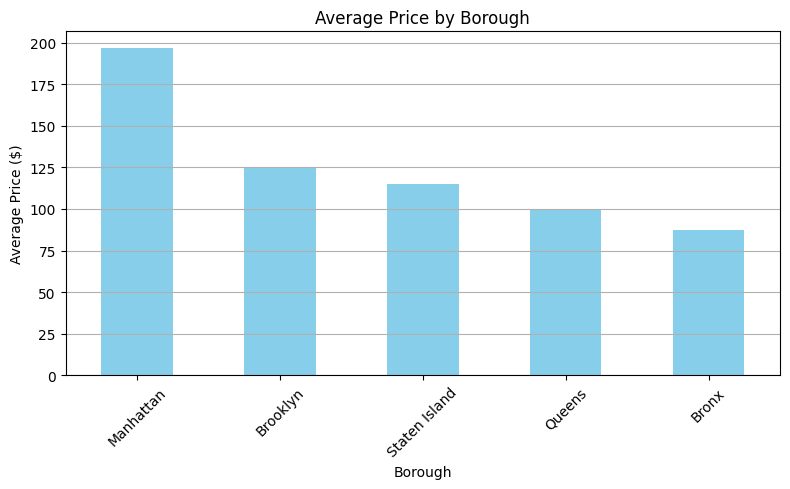

In [15]:
import matplotlib.pyplot as plt

avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

avg_price.plot(kind='bar', color='skyblue', figsize=(8,5), title='Average Price by Borough')
plt.ylabel('Average Price ($)')
plt.xlabel('Borough')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

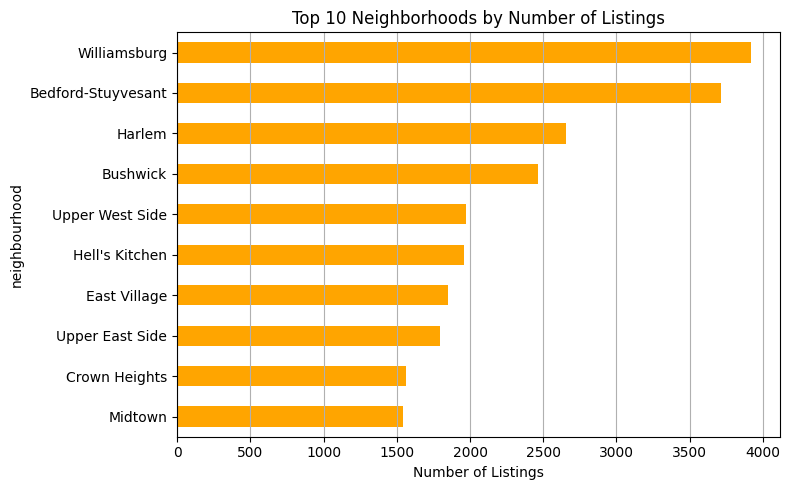

In [16]:
top_neighborhoods = df['neighbourhood'].value_counts().head(10)

top_neighborhoods.plot(kind='barh', color='orange', figsize=(8,5), title='Top 10 Neighborhoods by Number of Listings')
plt.xlabel('Number of Listings')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

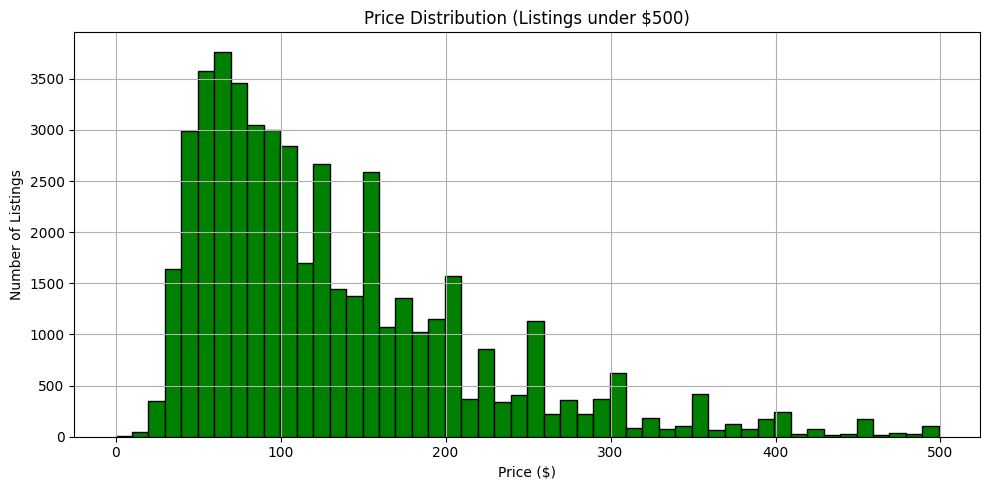

In [17]:
# Filter out extreme outliers for cleaner plot
df_filtered = df[df['price'] < 500]

plt.figure(figsize=(10, 5))
plt.hist(df_filtered['price'], bins=50, color='green', edgecolor='black')
plt.title('Price Distribution (Listings under $500)')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.tight_layout()
plt.show()

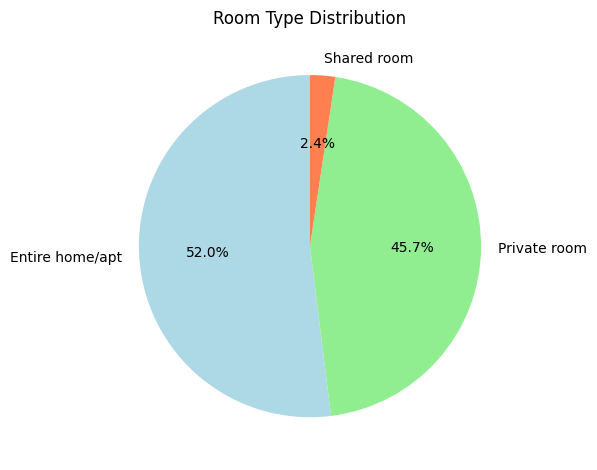

In [18]:
room_counts = df['room_type'].value_counts()

plt.figure(figsize=(6,6))
room_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'coral'])
plt.title('Room Type Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()